In [71]:
import os
import zipfile

In [72]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [73]:
local_zip = './tmp/databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/databasesLoadData')
zip_ref.close()

In [74]:
import json 
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt

# Para cargar formatos json en formatos jpg u standards

In [75]:
pathjasonSign64 = './tmp/databasesLoadData/sign_mnist_json/data.json' # path to json file

In [76]:
dataJson = []
with codecs.open(pathjasonSign64, 'rU', 'utf-8') as js:
    for line in js:
        dataJson.append(json.loads(line))
print("{} imagenes encontradas.".format(len(dataJson)))
print(dataJson)

9 imagenes encontradas.
[{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg', 'label': 'b'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/30_B.jpg', 'label': 'b'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/95_B.jpg', 'label': 'b'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/58_A.jpg', 'label': 'a'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/50_A.jpg', 'label': 'a'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/46_A.jpg', 'label': 'a'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/3_C.jpg', 'label': 'c'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/32_C.jpg', 'label': 'c'}, {'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/2_C.jpg', 'label': 'c'}]


In [77]:
response2 = requests.get('https://lookaside.fbsbx.com/ig_messaging_cdn/?asset_id=493241602559847&signature=AbyJ2CFgqF-8sSnuLPgZsvLgFiEVOPZ_cmiggcdO8aBy9xXqgBO-IF8M4pbV0xagWoDtOe2-c96DNDG6WenbRgpRwhkV5HZtJpt4pSiEQKndva7TCyGCrwOysdI2YXG34C-JNNCSsIYZxQd7n7lhr350m4LfNrHdeaHcOC89bV3ZE1RxAtIWoAsfMeDOM7sr_m8ZJ_Jq3-jsU4SIinqAUK0f8Cetdw')
#save image in tmp folder
img = Image.open(BytesIO(response2.content))
img.save('./tmp/databasesLoadData/sign_mnist_json/image.png')

In [78]:
imagenes = []
for objectImage in dataJson:
    response = requests.get(objectImage['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    imagenes.append([img, objectImage['label']])

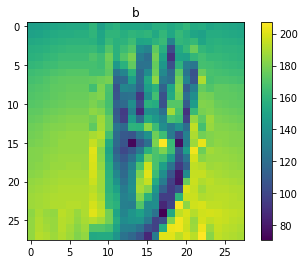

In [79]:
plt.imshow(imagenes[0][0].reshape(28, 28))
plt.title(imagenes[0][1])
plt.colorbar()
plt.show()

# Para cargar imagenes en formato 64 bits

In [80]:
import base64

In [81]:
url_imagenBase64 = './tmp/databasesLoadData/sign_mnist_base64/data.json'

In [82]:
with open(url_imagenBase64, 'r') as f:
    data = json.load(f)

In [83]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [84]:
base64_img_bytes = data['b'].encode('utf-8')
path_img = './tmp/databasesLoadData/sign_mnist_base64/decoded_image.png'
with open(path_img, 'wb') as f:
    f.write(base64.decodebytes(base64_img_bytes))

In [85]:
img = Image.open(path_img)
img

# Convertir imagenes de formato cvs

In [86]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [87]:
train_url = './tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv'
test_url = './tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv'

In [95]:
train_file = pd.read_csv(train_url)
test_file = pd.read_csv(test_url)

In [96]:
train_file.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [97]:
train_file.shape

(27455, 785)

In [98]:
labels = train_file['label'].values  #Get  tag of image

In [101]:
train_file.drop(['label'], axis=1, inplace=True) # remoce 1 colum with the label laberl and save in the same dataframe

KeyError: "['label'] not found in axis"

In [102]:
train_file.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [103]:
imagenes = train_file.values

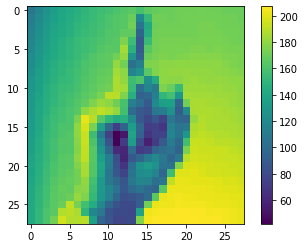

In [106]:
plt.imshow(imagenes[0].reshape(28, 28))
plt.colorbar()
plt.show()